In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter

# Acc and ECE

In [ ]:
datasets = ["bloodmnist", 'dermamnist', 'pneumoniamnist', "organsmnist"]

columns = ["dataset", "seed","experiment_type", "num_labeled", "test_acc", "test_loss", "test_ece", "acc_per_class", "class_dist", "full_dist", 'optim']
df = pd.DataFrame(columns=columns)


for dataset in datasets:
    test_dir = f"./test"
    for seed in os.listdir(test_dir):
        for folder in os.listdir(f'{test_dir}/{seed}'):
            exp_type, calibrated, optim, num_labeled = folder.split("_")
            exp_type = f"{exp_type}_{calibrated}"

            test_metrics = pd.read_csv(f"{test_dir}/{seed}/{folder}/test_metrics.csv")
            acc_per_class = pd.read_csv(f"{test_dir}/{seed}/{folder}/accuracy_per_class.csv")
            class_dist = pd.read_csv(f"{test_dir}/{seed}/{folder}/class_distribution.csv")
            full_dist = pd.read_csv(f"{test_dir}/{seed}/{folder}/full_distribution.csv")

            acc_per_class_dict = {}
            class_dist_dict = {}
            full_dist_dict = {}

            for acc_col, dist_col, full_col in zip(acc_per_class.columns, class_dist.columns, full_dist.columns):
                acc_per_class_dict[acc_col] = acc_per_class[acc_col].values[0]
                class_dist_dict[dist_col] = class_dist[dist_col].values[0]
                full_dist_dict[full_col] = full_dist[full_col].values[0]

            test_acc = test_metrics["test_acc"].values[-1]
            test_loss = test_metrics["test_loss"].values[-1]
            test_ece = test_metrics["test_ece"].values[-1]

            df.loc[len(df)] = {
                "dataset": dataset,
                "seed": int(seed.split("_")[-1]),
                "experiment_type": exp_type,
                "num_labeled": int(num_labeled),
                "test_acc": test_acc,
                "test_loss": test_loss,
                "test_ece": test_ece,
                "acc_per_class": acc_per_class_dict,
                "class_dist": class_dist_dict,
                "full_dist": full_dist_dict,
                "optim": optim,
            }

df = df.sort_values(by=["experiment_type", "num_labeled"])

In [3]:
df_agg = df.groupby(["dataset", "experiment_type", "num_labeled", "optim"]).agg(
    {
        "test_acc": ["mean", "std"],
        "test_loss": ["mean", "std"],
        "test_ece": ["mean", "std"],
    }
)

df_agg

test_acc            \
                                                       mean       std   
dataset        experiment_type  num_labeled optim                       
bloodmnist     active_jempp     250         sgd    0.825490  0.000000   
                                500         sgd    0.892137  0.000000   
                                750         sgd    0.923999  0.000000   
                                1000        sgd    0.924554  0.000092   
                                1250        sgd    0.937153  0.000000   
...                                                     ...       ...   
pneumoniamnist active_softmax   3500        sgd    0.833333  0.000000   
                                3750        sgd    0.911859  0.000000   
                                4000        sgd    0.908654  0.000000   
               baseline_softmax 4000        adam   0.876603  0.000000   
                                            sgd    0.907051  0.000000   

                                                  test_loss                \
                                                       mean           std   
dataset        experiment_type  num_labeled optim                           
bloodmnist     active_jempp     250         sgd    0.898177  1.716375e-05   
                                500         sgd    0.365079  6.917957e-06   
                                750         sgd    0.288293  3.401429e-06   
                                1000        sgd    0.276160  7.679395e-06   
                                1250        sgd    0.204140  4.048794e-07   
...                                                     ...           ...   
pneumoniamnist active_softmax   3500        sgd    0.703371  0.000000e+00   
                                3750        sgd    0.322716  0.000000e+00   
                                4000        sgd    0.341683  0.000000e+00   
               baseline_softmax 4000        adam   0.538095  0.000000e+00   
                                            sgd    0.340154  0.000000e+00   

                                                   test_ece                
                                                       mean           std  
dataset        experiment_type  num_labeled optim                          
bloodmnist     active_jempp     250         sgd    0.120293  1.393045e-06  
                                500         sgd    0.050734  2.024287e-07  
                                750         sgd    0.042941  7.750175e-07  
                                1000        sgd    0.040557  9.292817e-05  
                                1250        sgd    0.024737  1.714174e-07  
...                                                     ...           ...  
pneumoniamnist active_softmax   3500        sgd    0.167814  0.000000e+00  
                                3750        sgd    0.083110  0.000000e+00  
                                4000        sgd    0.075840  0.000000e+00  
               baseline_softmax 4000        adam   0.123313  0.000000e+00  
                                            sgd    0.078388  0.000000e+00  

[149 rows x 6 columns]

In [8]:
results = df_agg.xs("organsmnist", level="dataset")
results["test_ece"]

mean           std
experiment_type  num_labeled optim                        
active_jempp     250         sgd    0.203946  9.693655e-07
                 500         sgd    0.170021  6.020374e-07
                 750         sgd    0.175783  8.744210e-07
                 1000        sgd    0.145802  8.507849e-07
                 1250        sgd    0.144412  3.905399e-08
                 1500        sgd    0.134339  2.012988e-07
                 1750        sgd    0.148482  3.566987e-05
                 2000        sgd    0.106975  7.472183e-07
                 2250        sgd    0.085556  4.902750e-07
                 2500        sgd    0.100011  5.729879e-07
                 2750        sgd    0.103054  1.248134e-06
                 3000        sgd    0.098479  3.556856e-05
                 3250        sgd    0.098522  9.257920e-07
                 3500        sgd    0.079378  2.108266e-07
                 3750        sgd    0.081438  1.700616e-07
                 4000        sgd    0.070017  6.495278e-07
active_softmax   250         sgd    0.244857  0.000000e+00
                 500         sgd    0.198942  0.000000e+00
                 750         sgd    0.193132  0.000000e+00
                 1000        sgd    0.191582  0.000000e+00
                 1250        sgd    0.179322  0.000000e+00
                 1500        sgd    0.158501  0.000000e+00
                 1750        sgd    0.173752  0.000000e+00
                 2000        sgd    0.143347  0.000000e+00
                 2250        sgd    0.152656  0.000000e+00
                 2500        sgd    0.130703  0.000000e+00
                 2750        sgd    0.142166  0.000000e+00
                 3000        sgd    0.106101  0.000000e+00
                 3250        sgd    0.117549  0.000000e+00
                 3500        sgd    0.116011  0.000000e+00
                 3750        sgd    0.109803  0.000000e+00
                 4000        sgd    0.100413  0.000000e+00
baseline_softmax 4000        sgd    0.067527  0.000000e+00

In [10]:
# Reset the index of the results DataFrame
# Get the index of the minimum test_ece for each experiment type
min_ece_idx = results.groupby(["experiment_type", "optim"])["test_ece"].idxmin()
min_ece_idx

test_ece  \
                                                 mean   
experiment_type  optim                                  
active_jempp     sgd        (active_jempp, 4000, sgd)   
active_softmax   sgd      (active_softmax, 4000, sgd)   
baseline_softmax sgd    (baseline_softmax, 4000, sgd)   

                                                       
                                                  std  
experiment_type  optim                                 
active_jempp     sgd        (active_jempp, 1250, sgd)  
active_softmax   sgd       (active_softmax, 250, sgd)  
baseline_softmax sgd    (baseline_softmax, 4000, sgd)

bloodmnist sgd


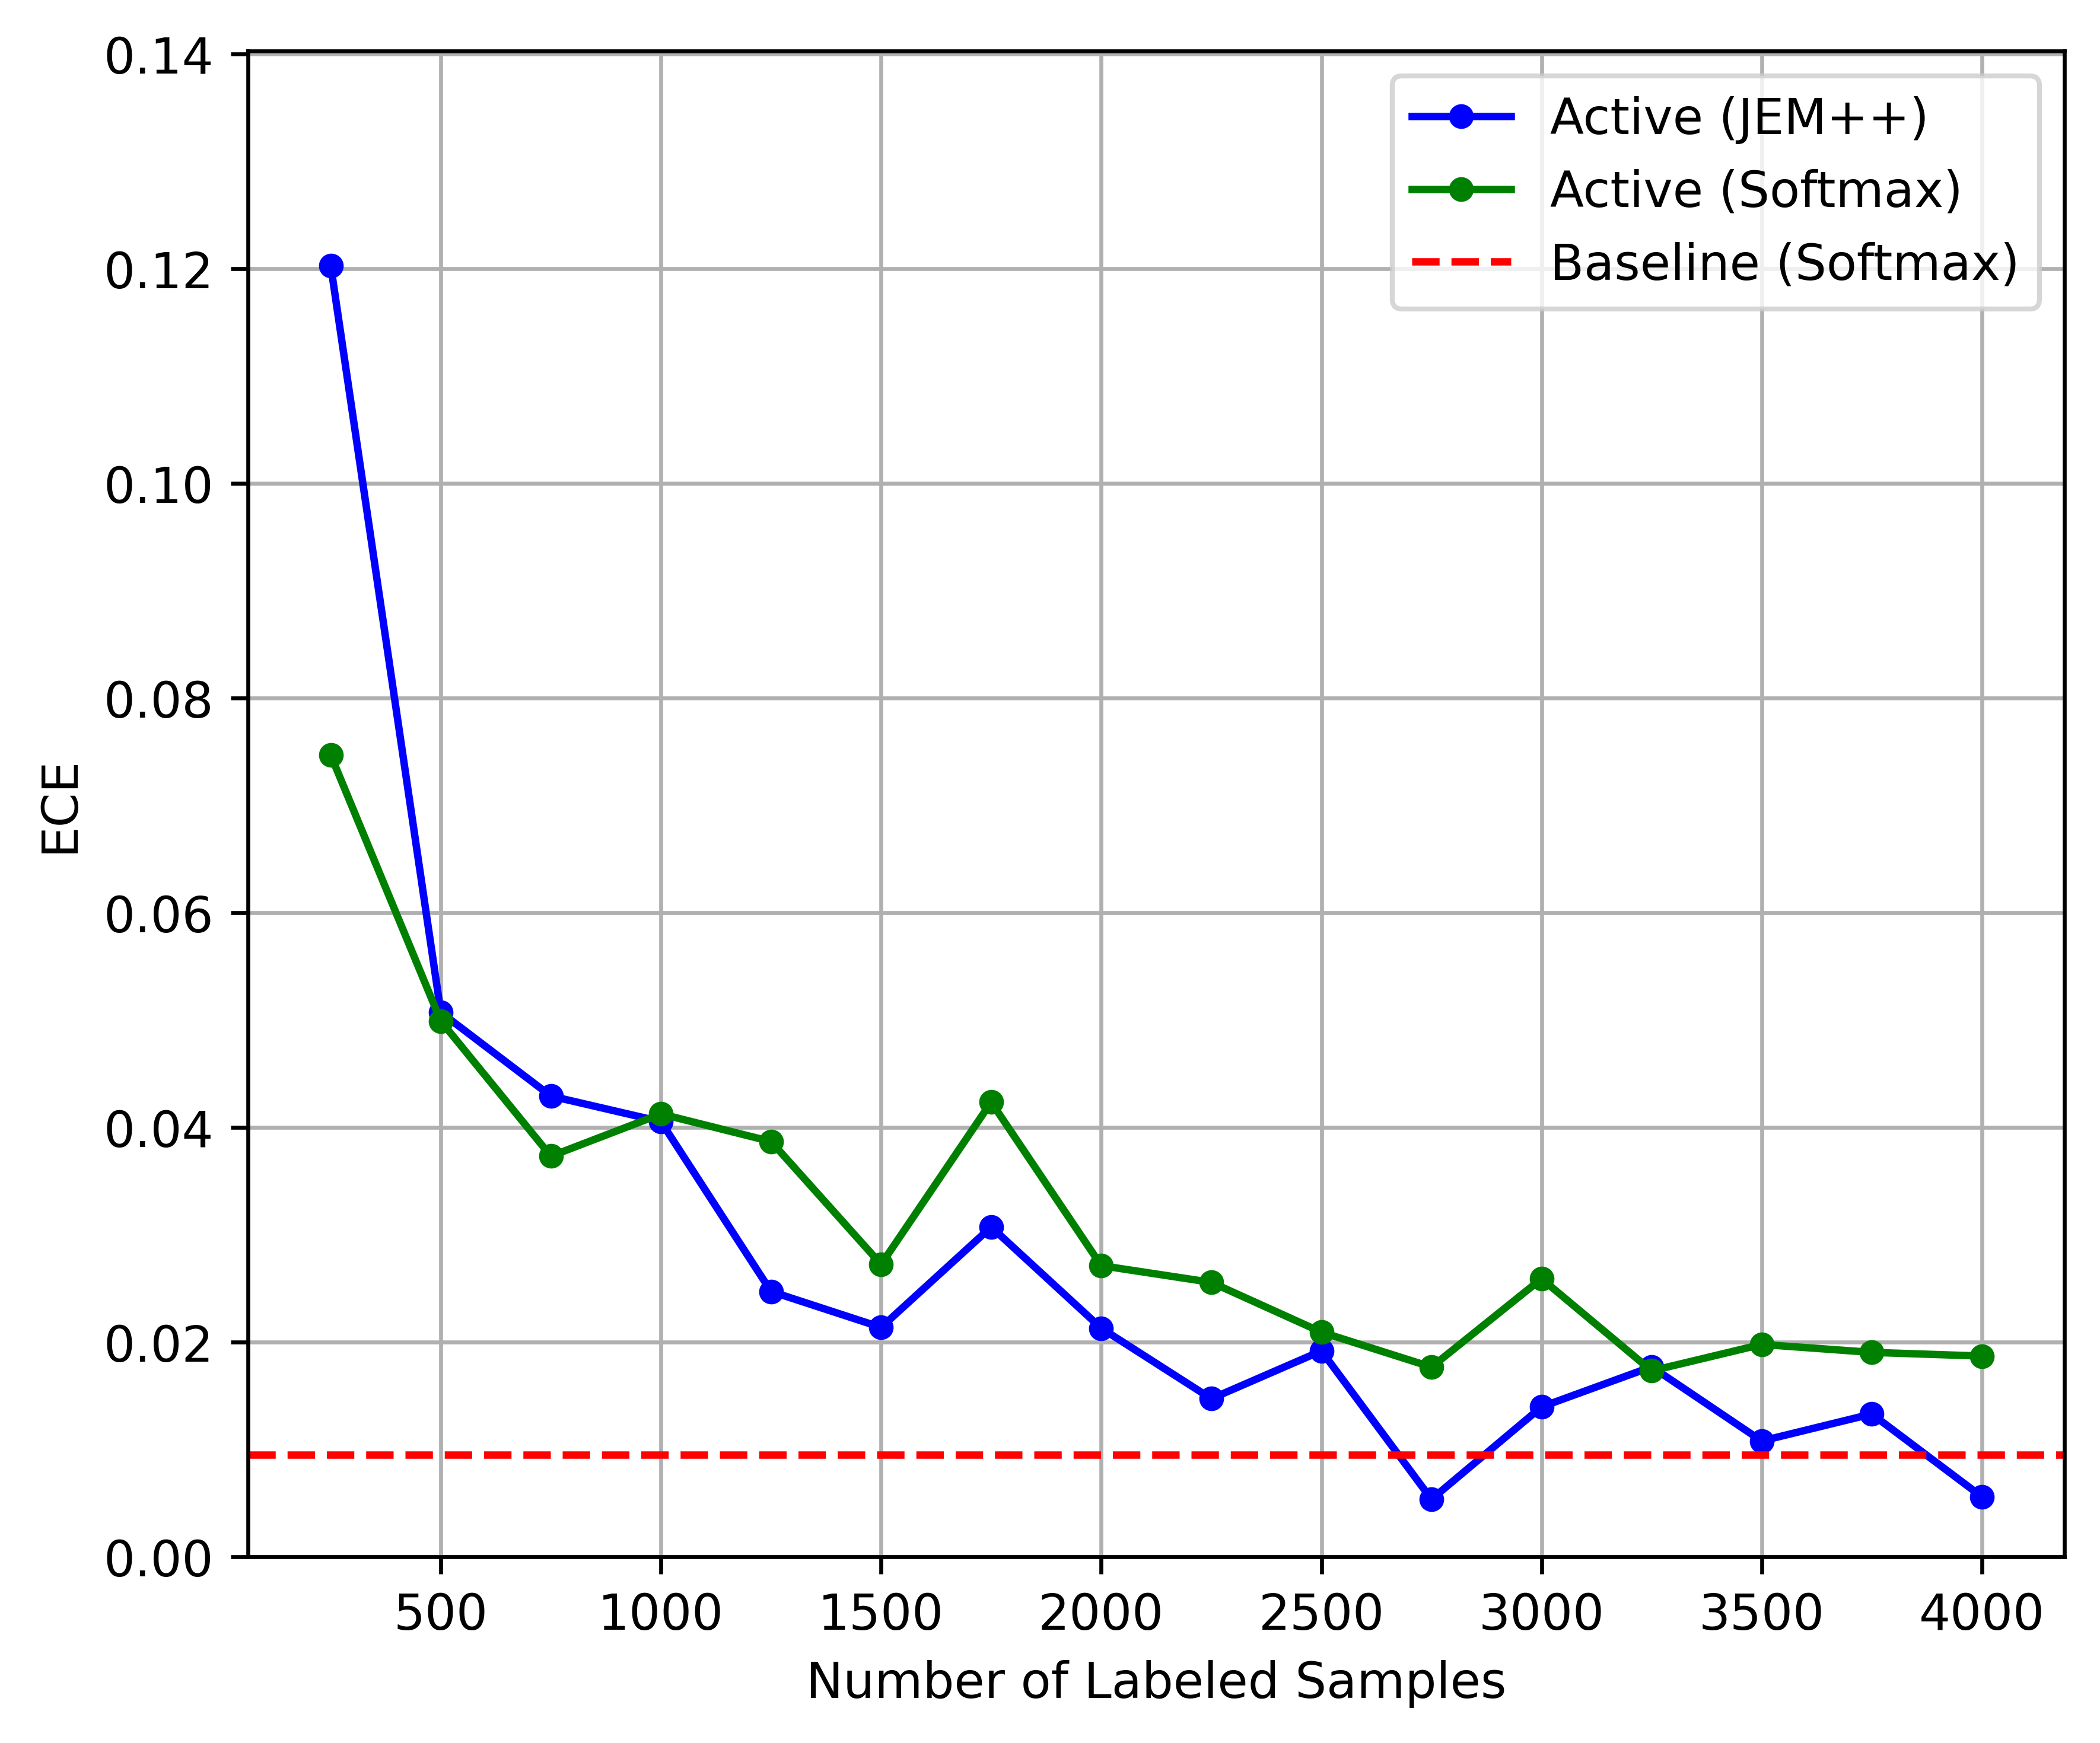

dermamnist sgd


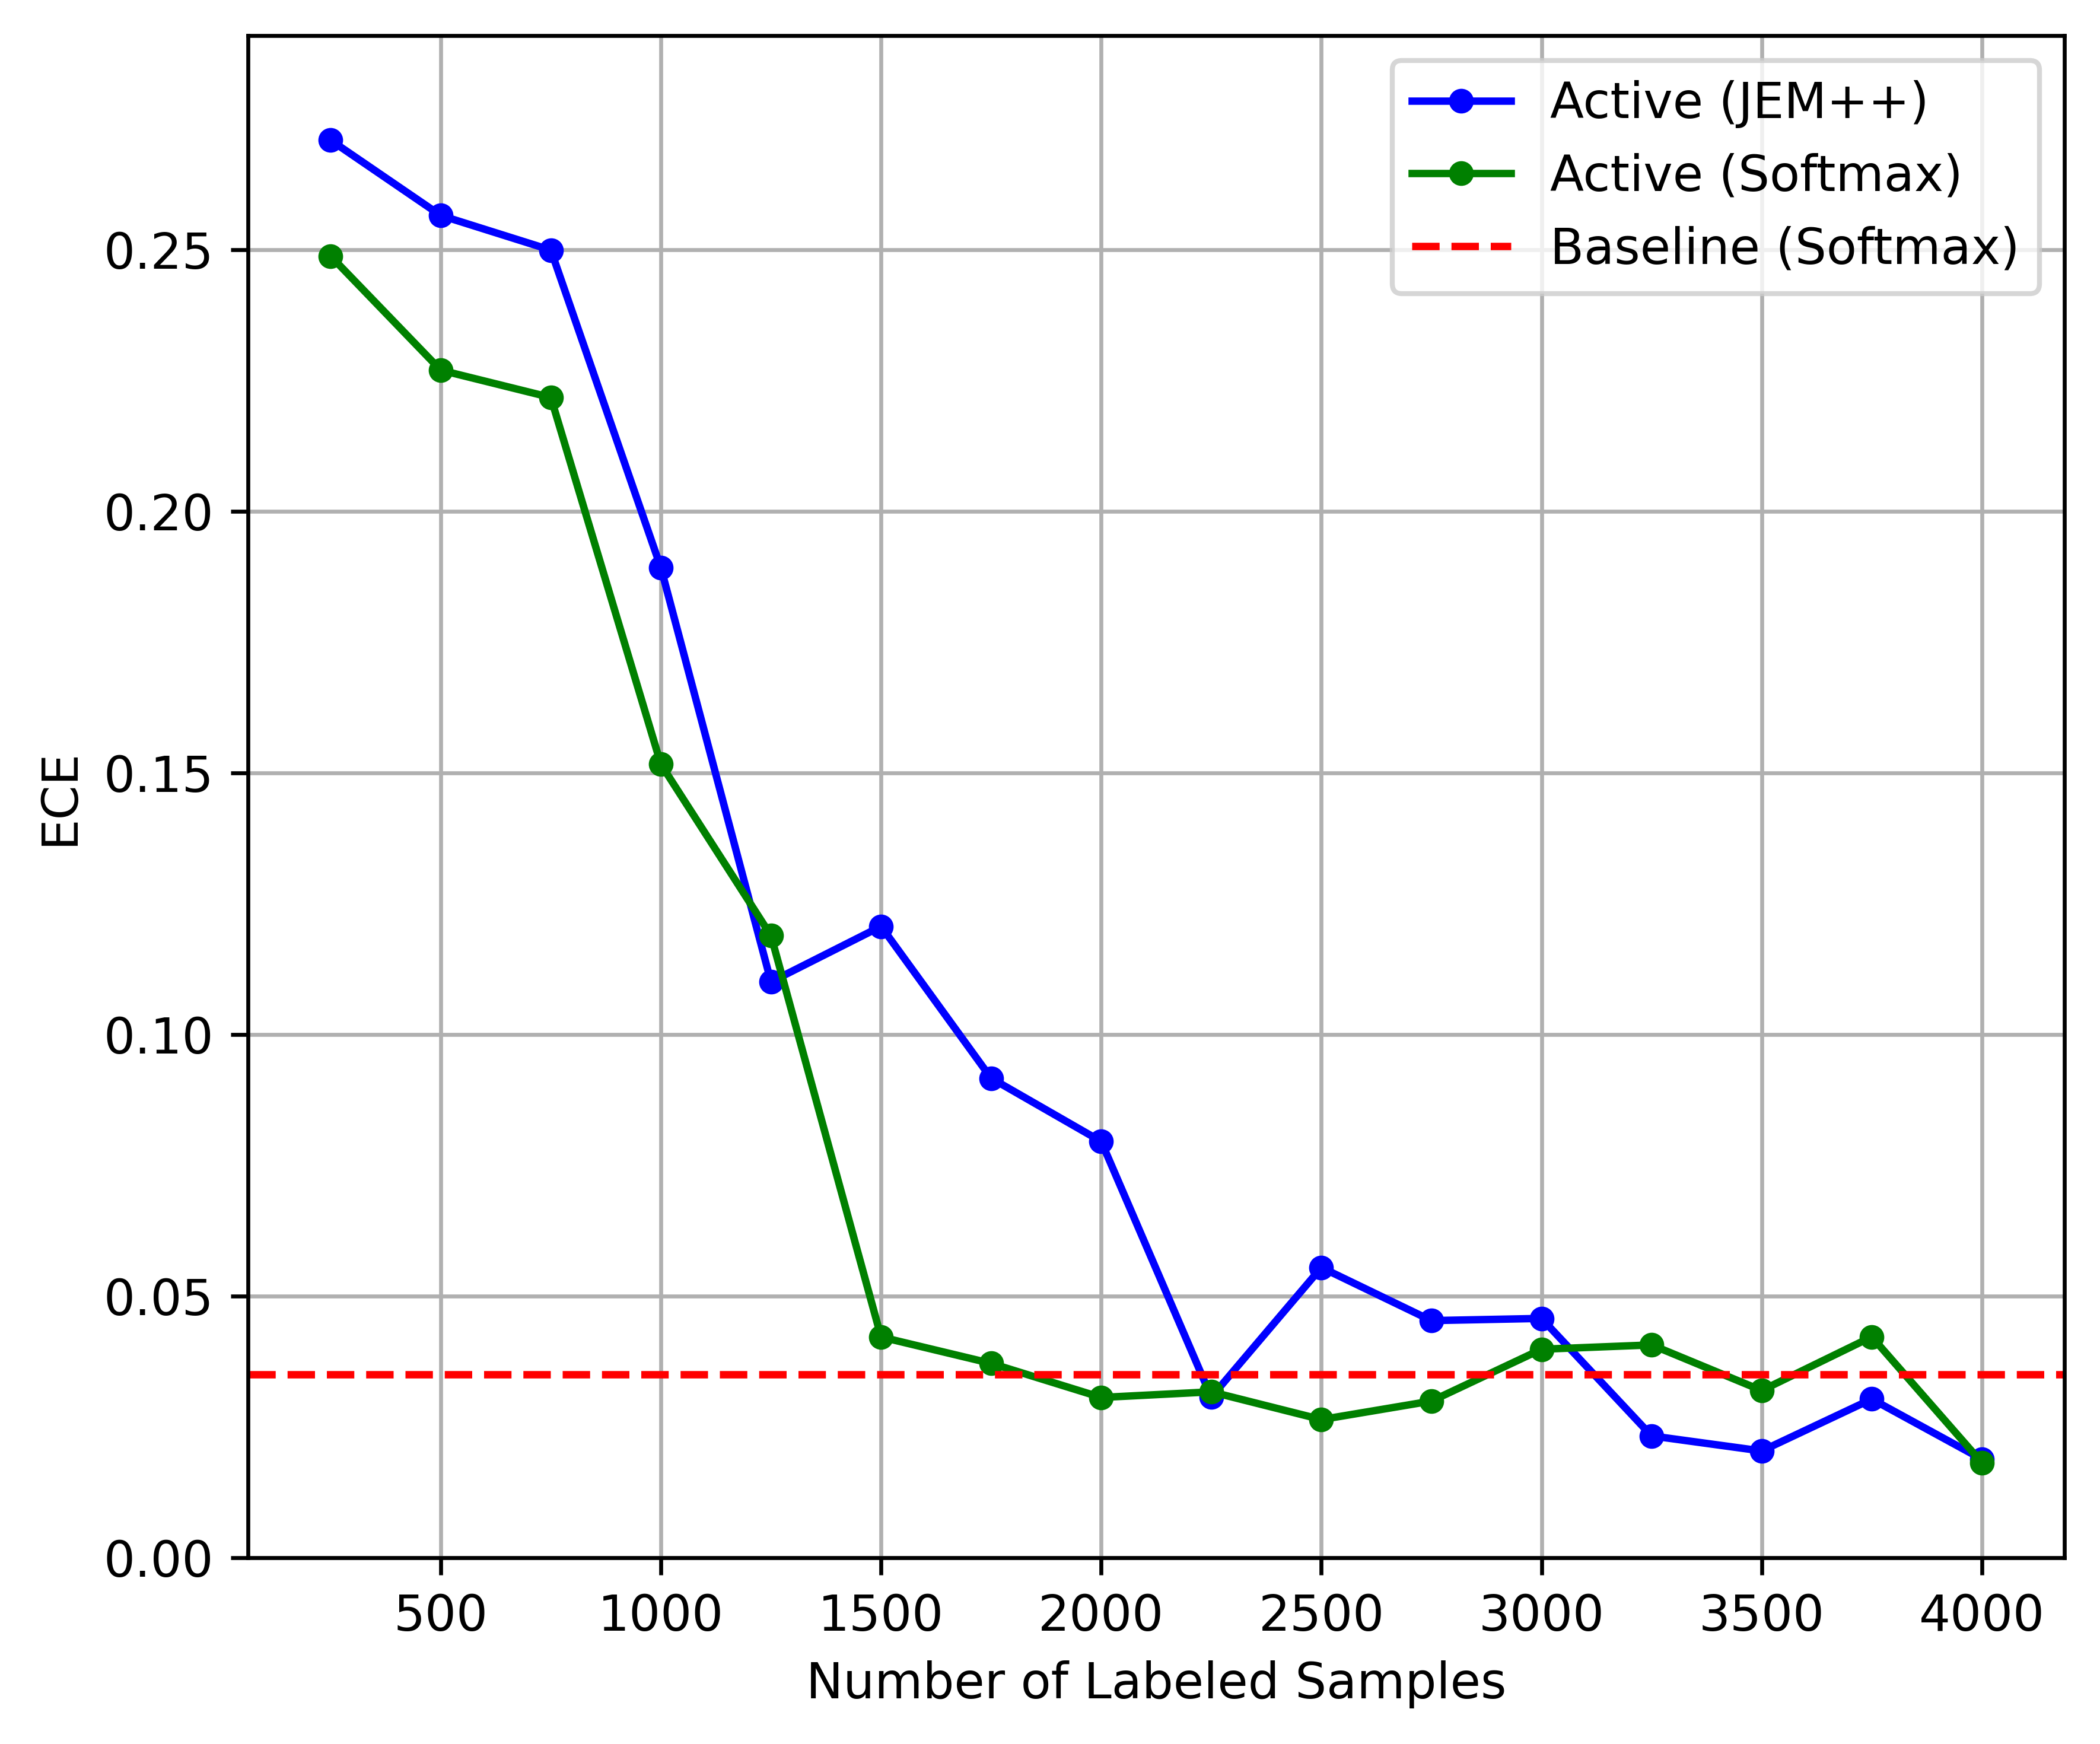

organsmnist sgd


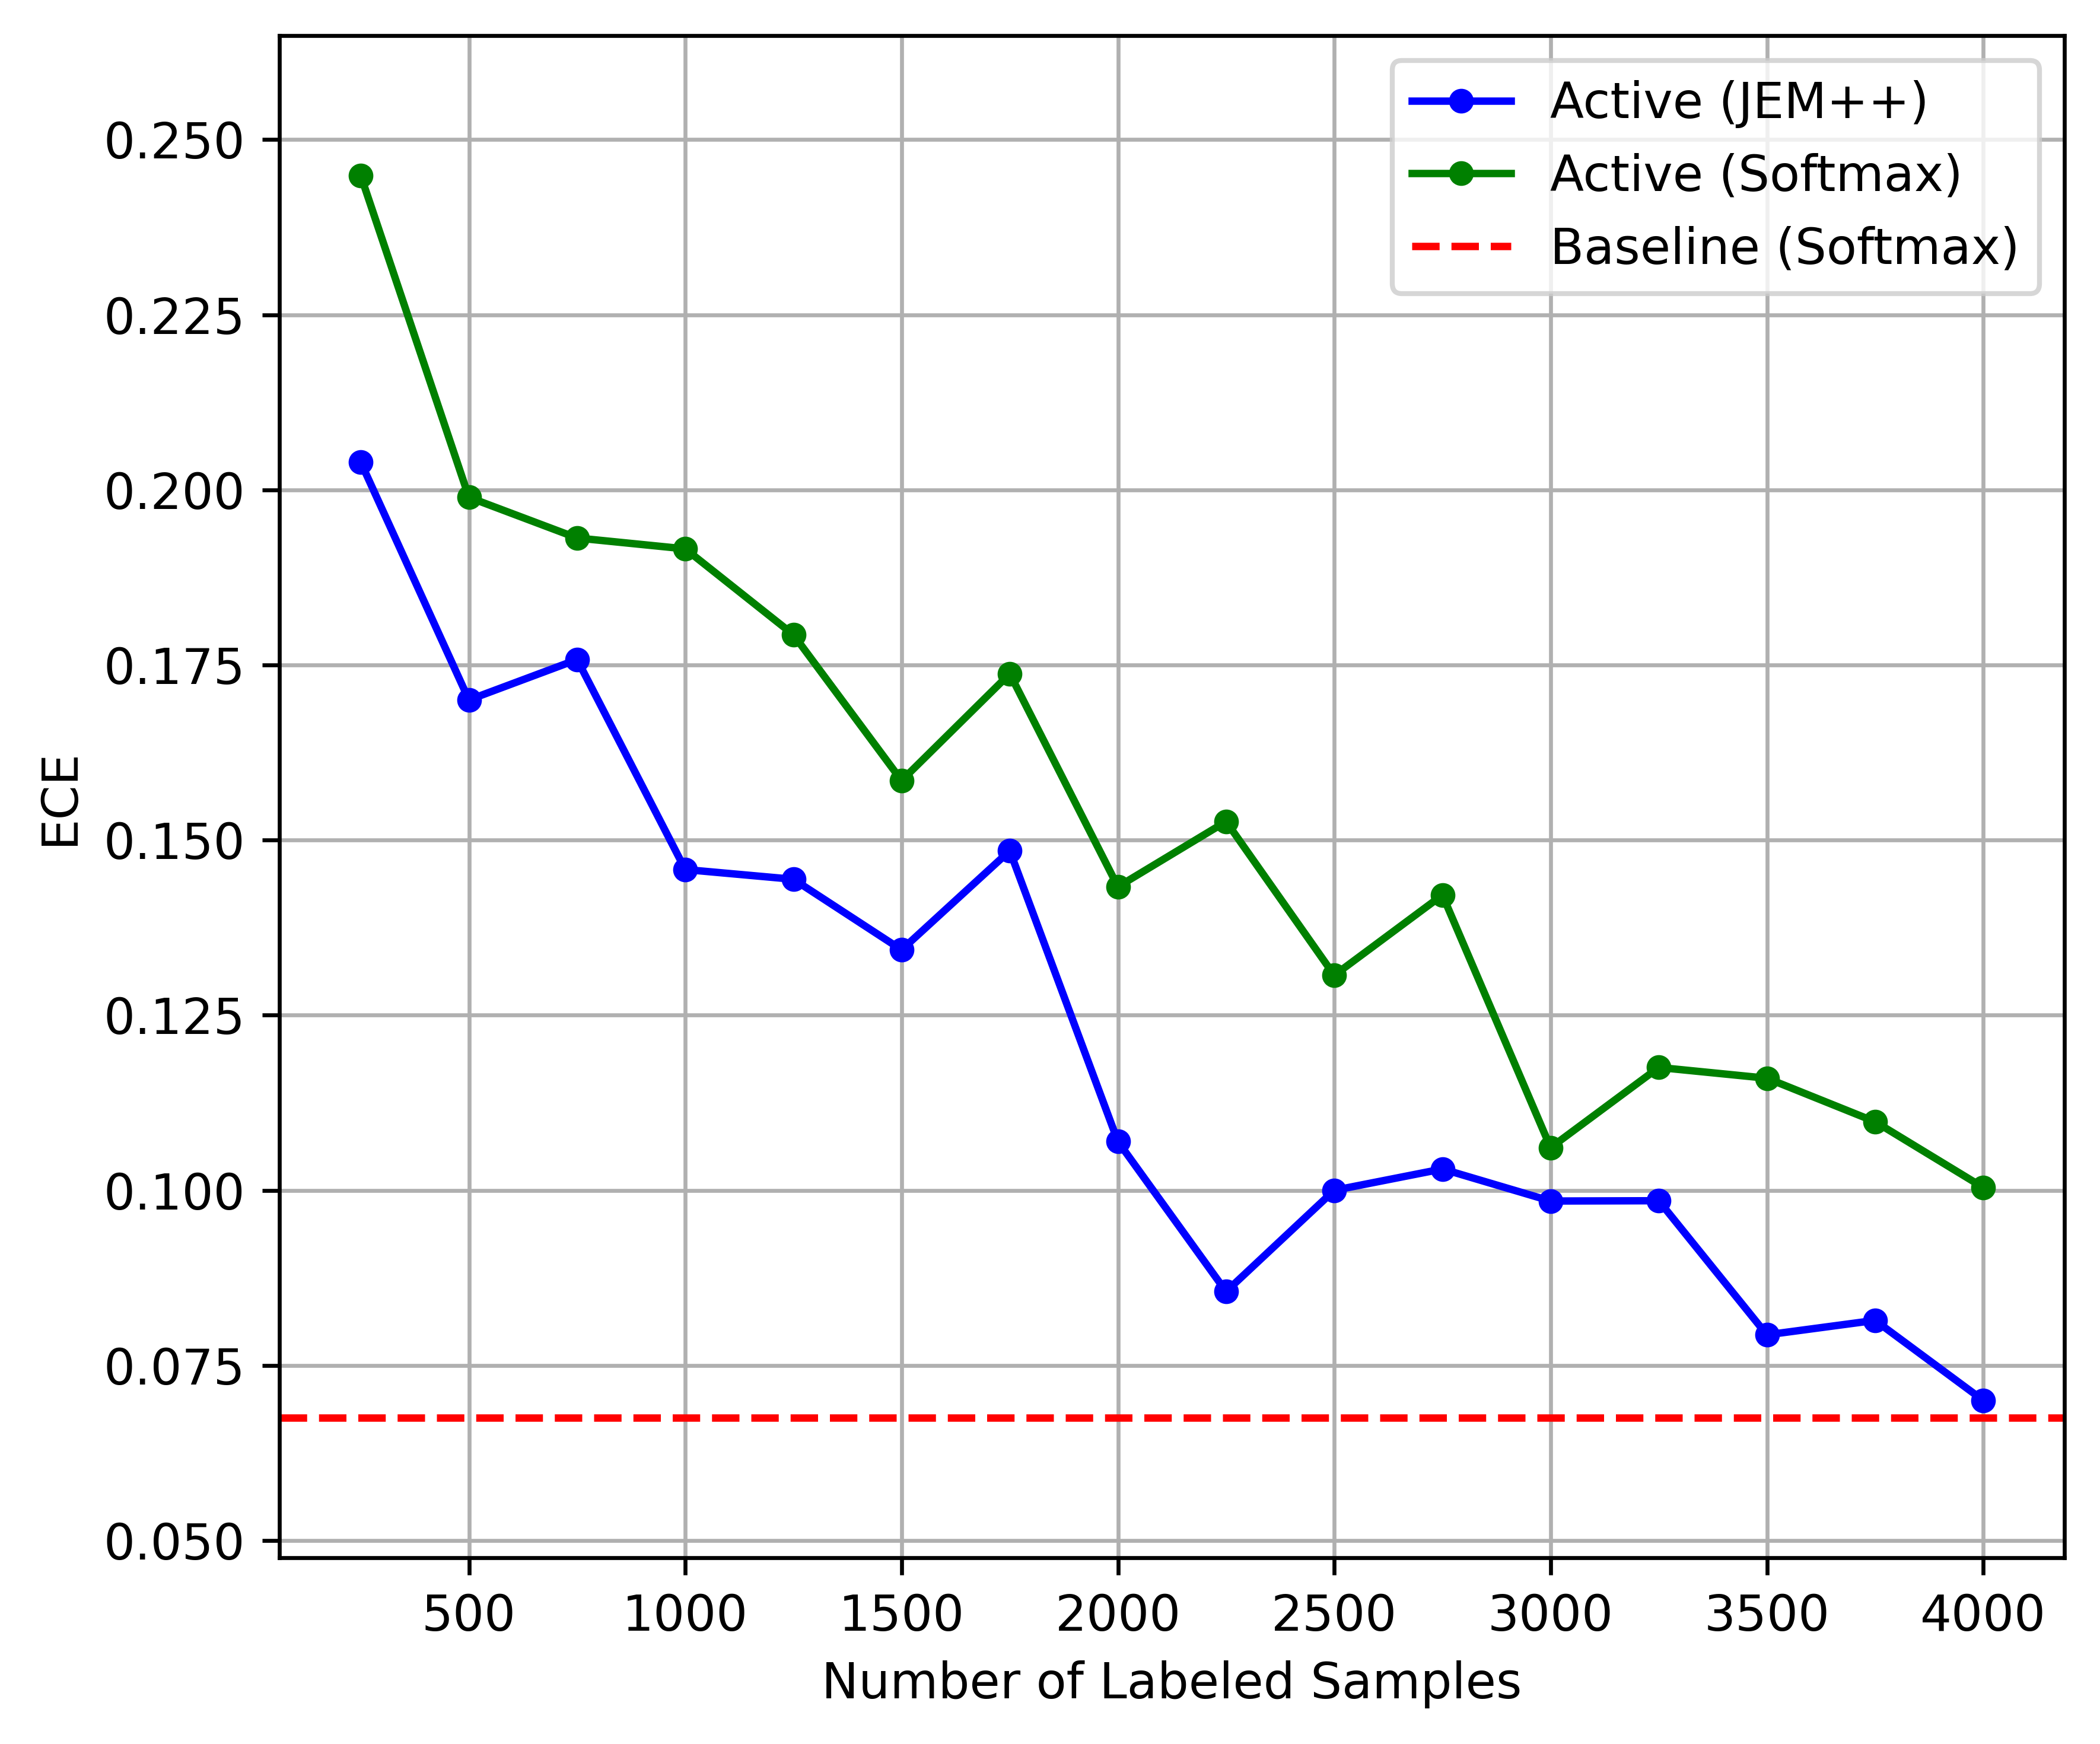

pneumoniamnist sgd


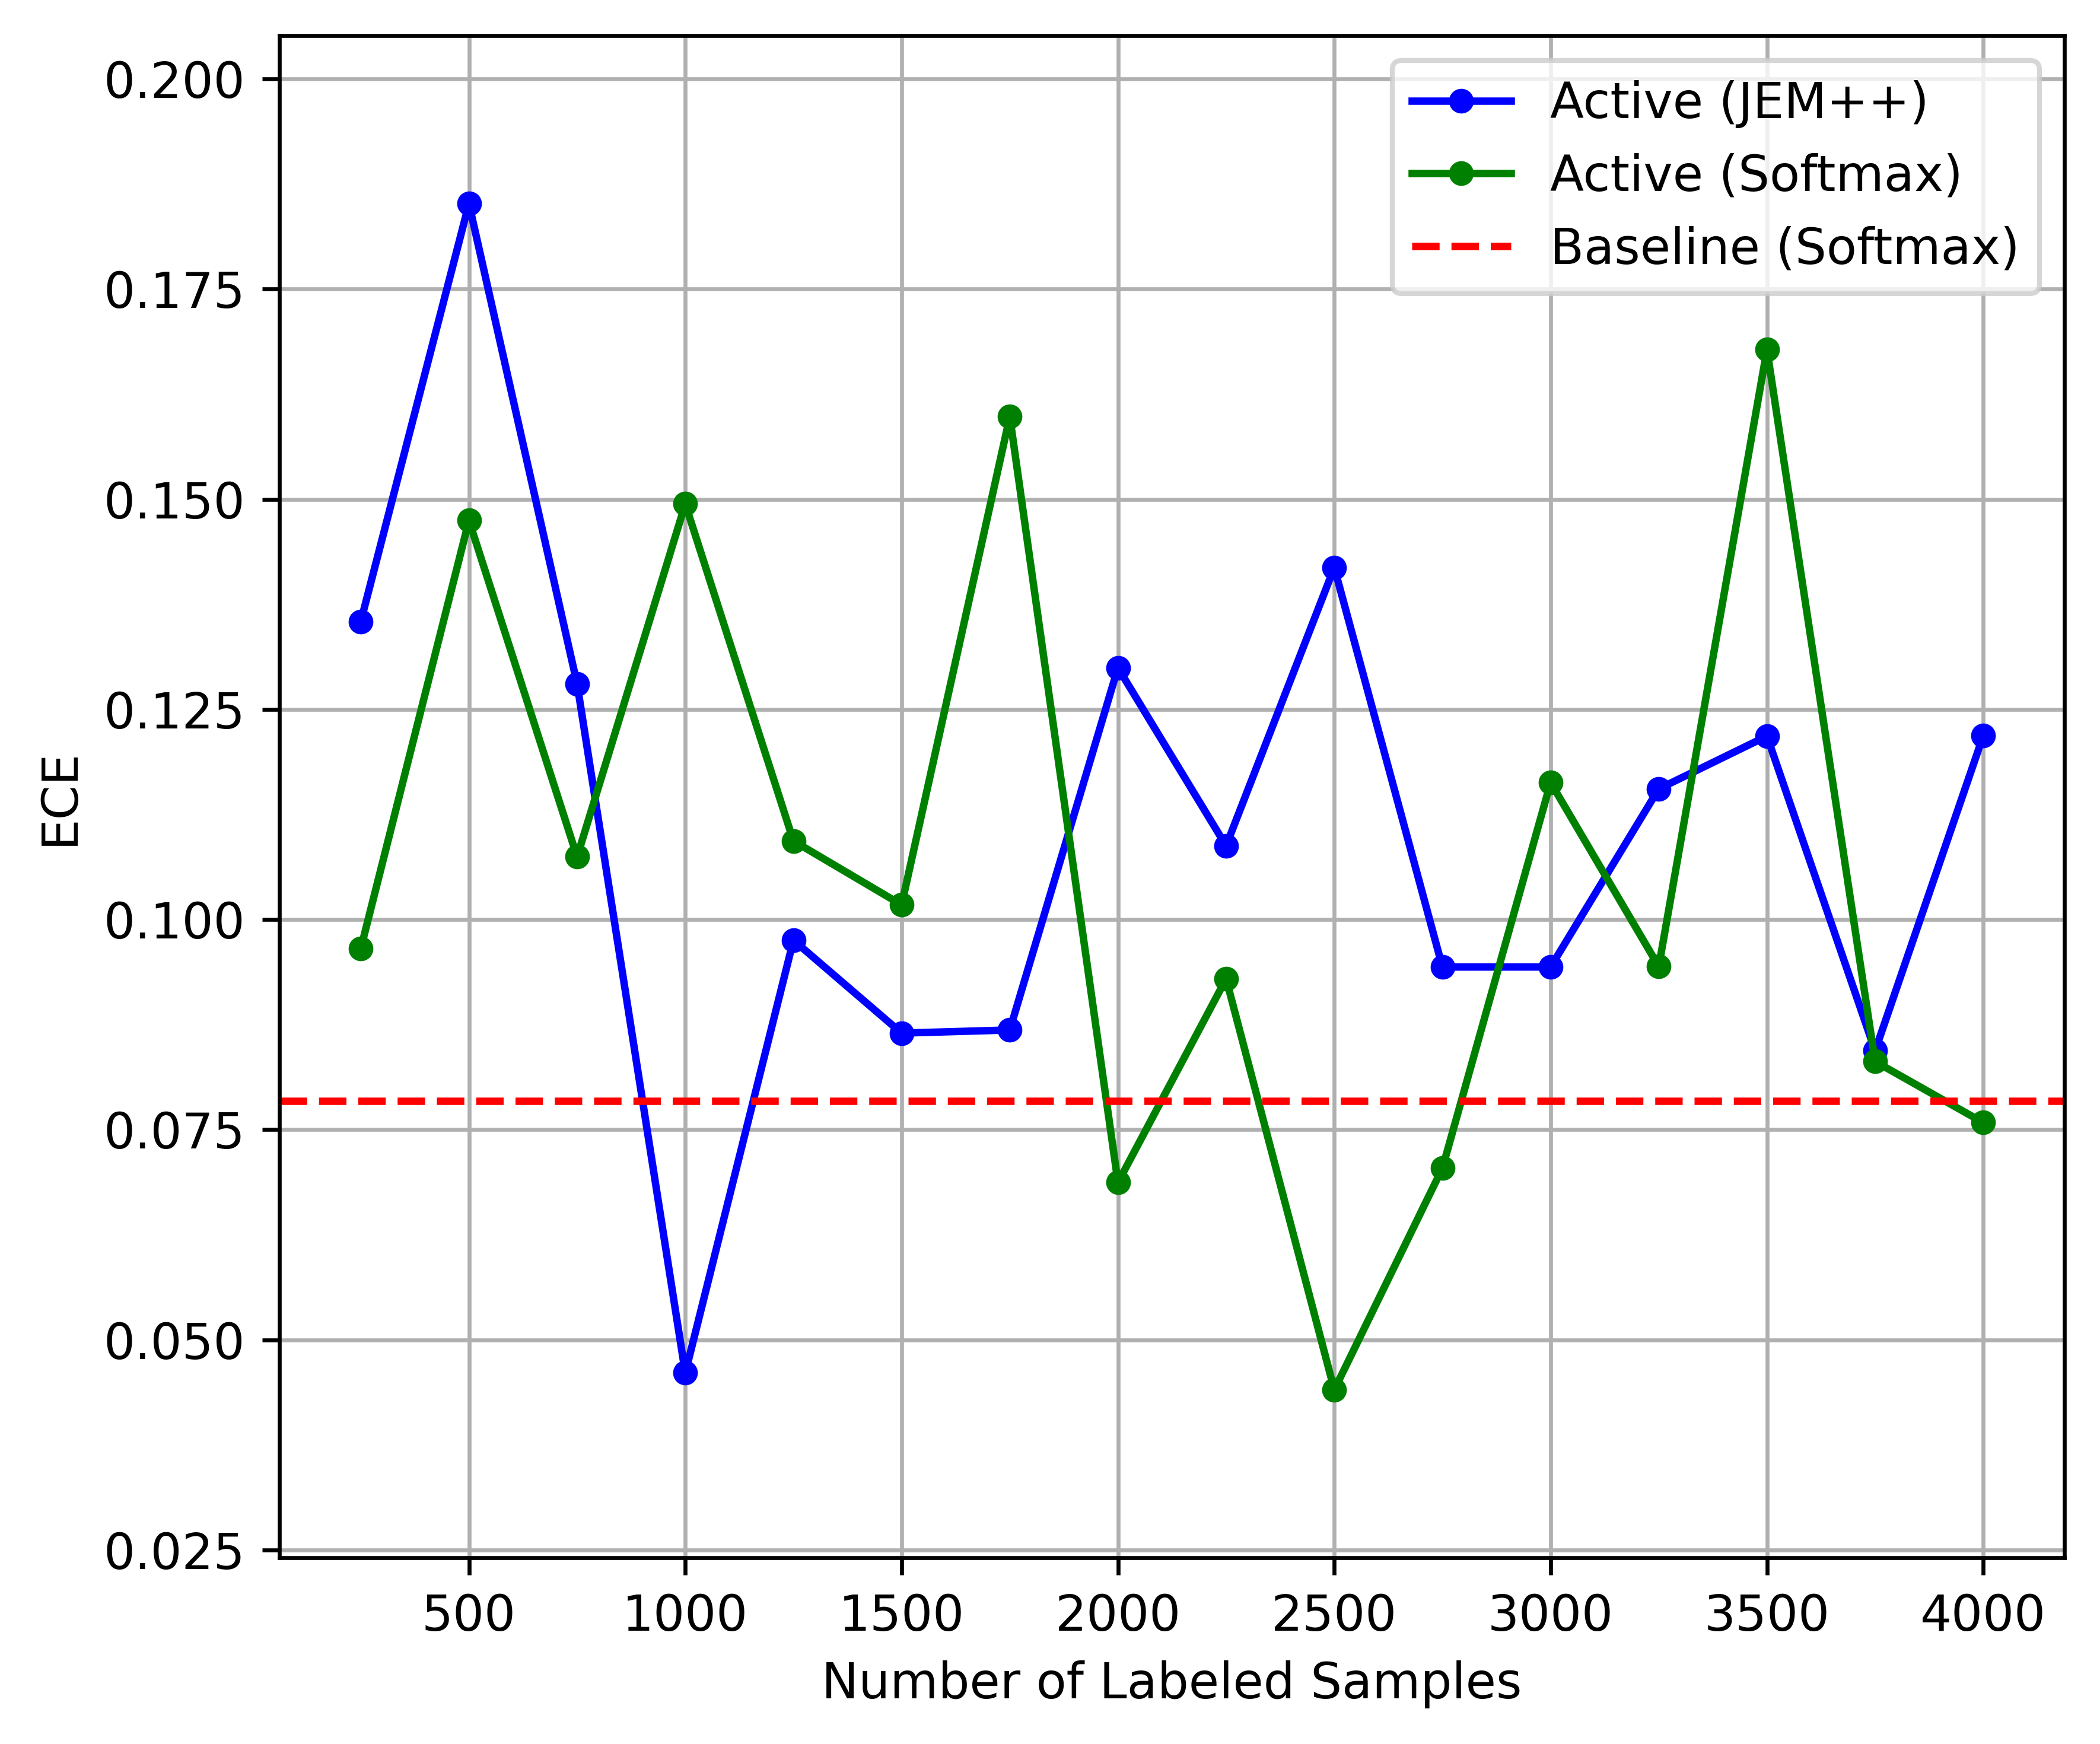

pneumoniamnist adam


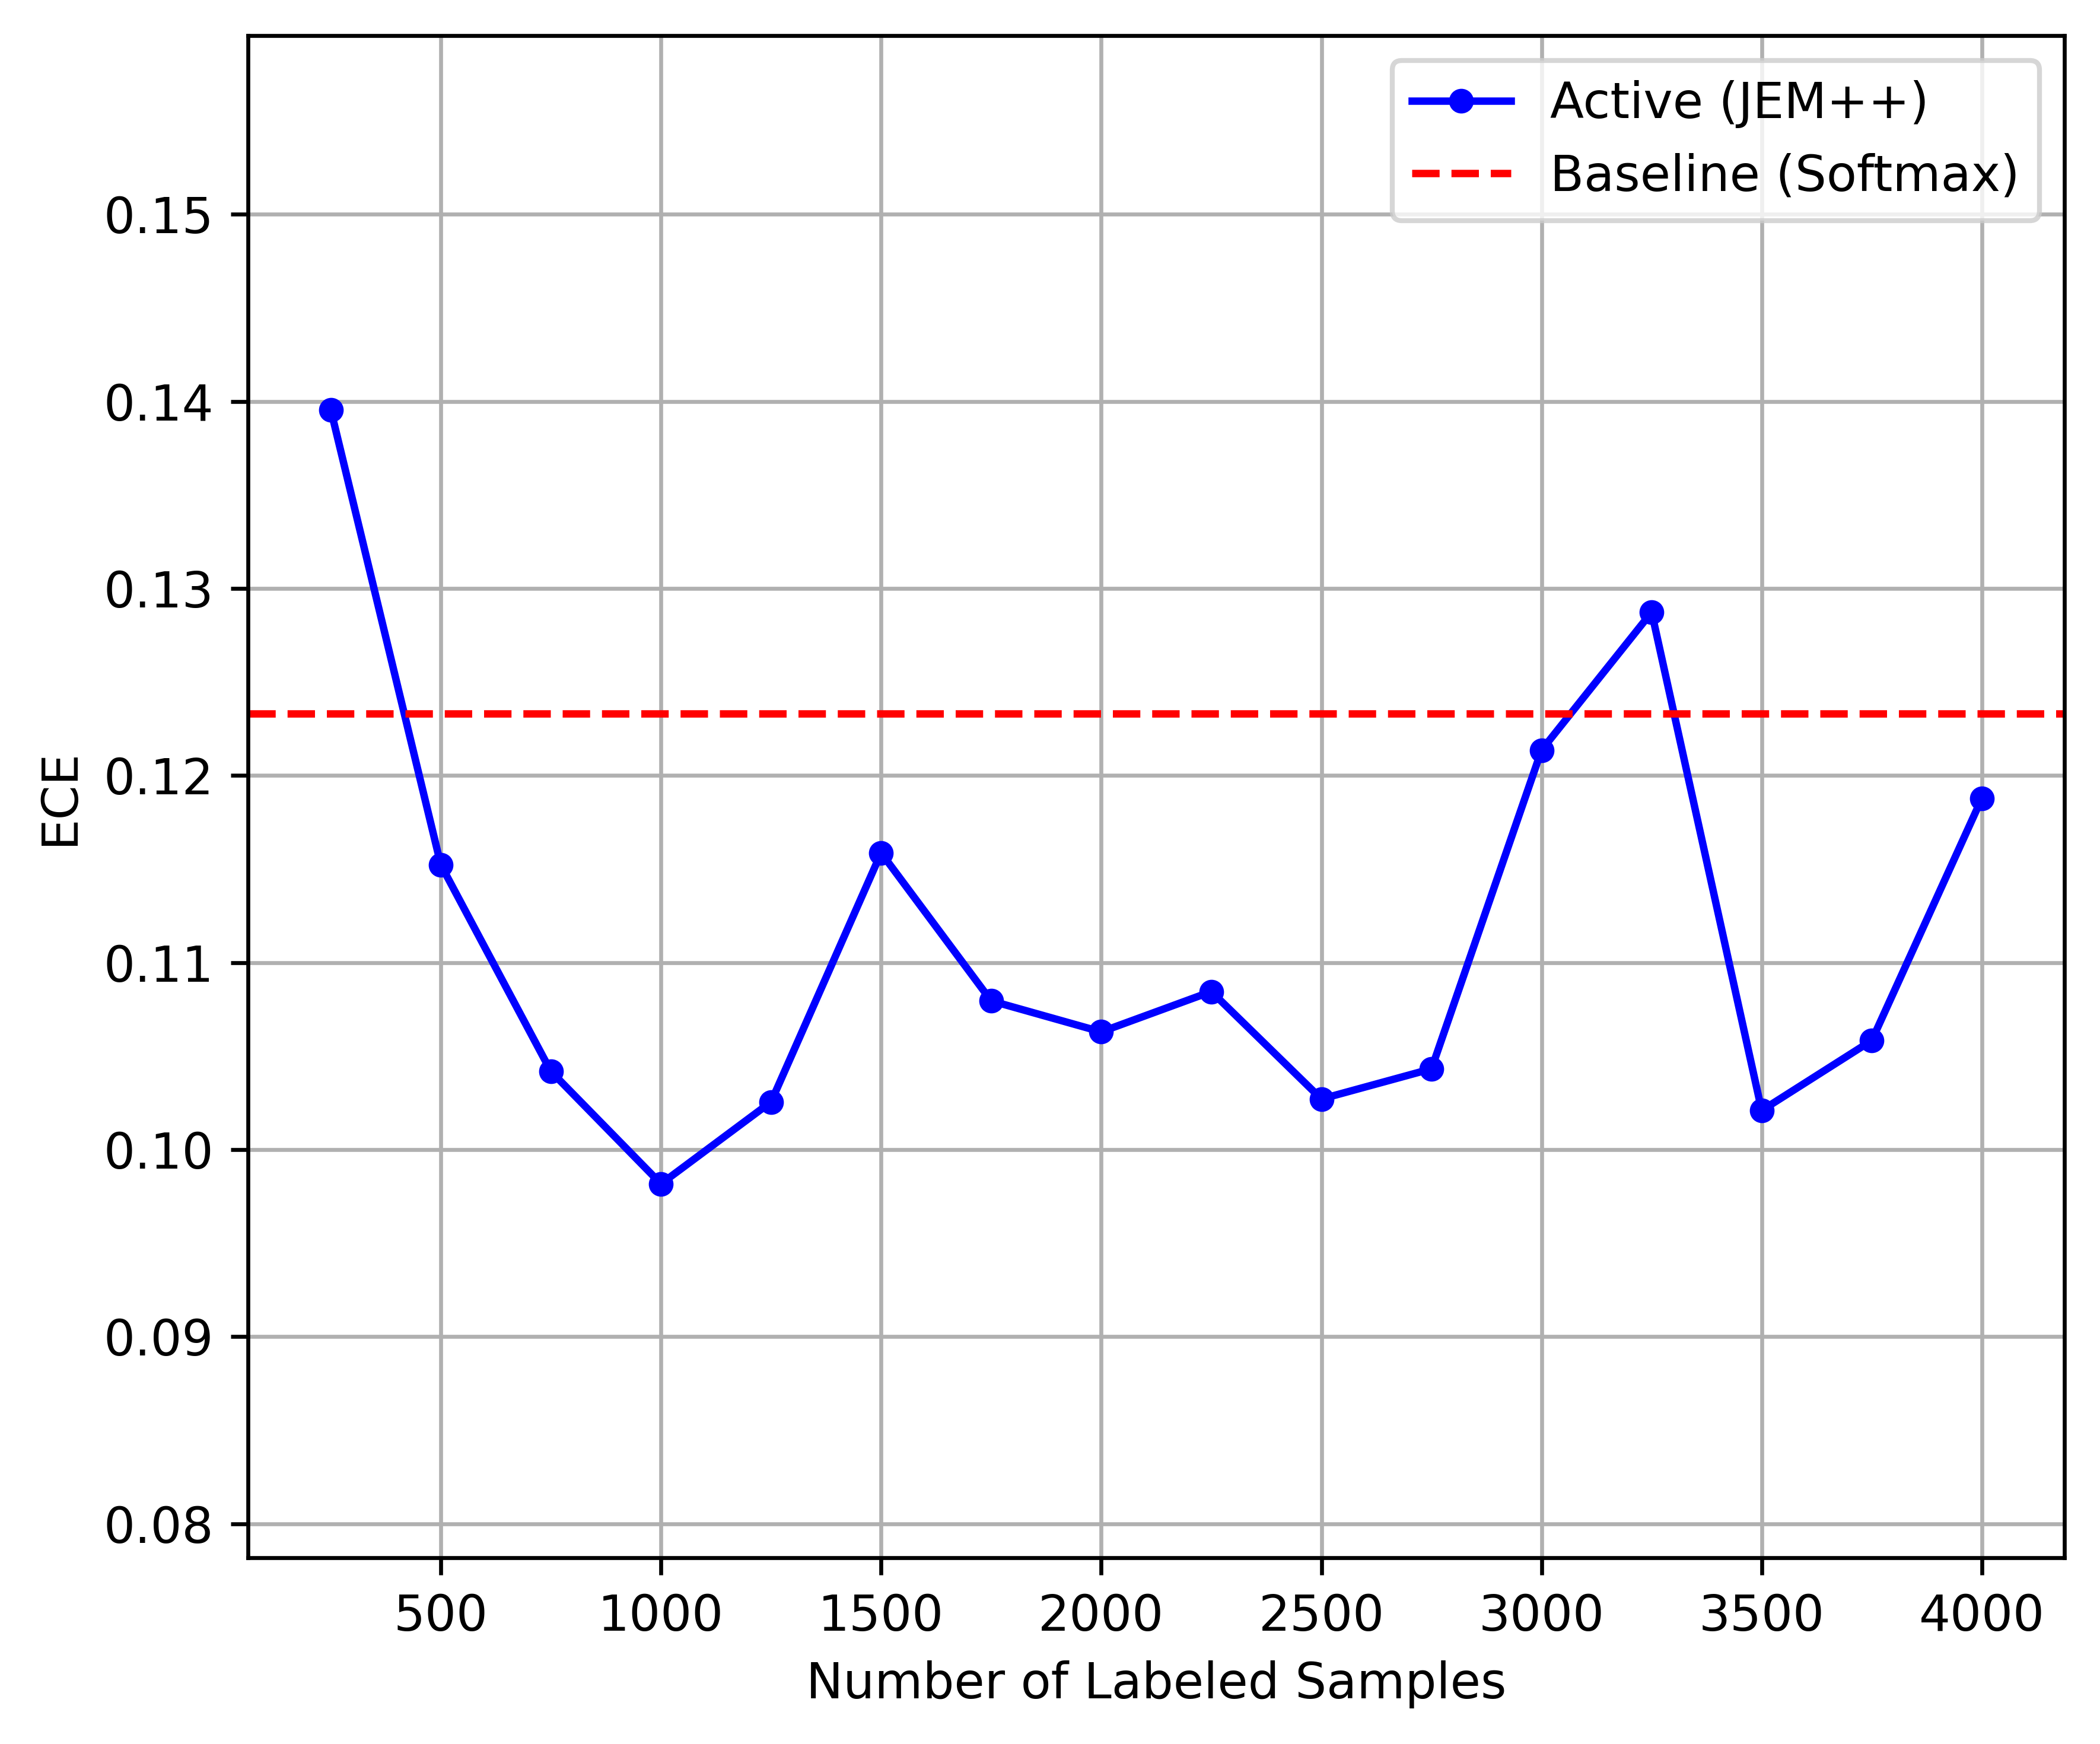

In [12]:
# Define the datasets and optimization methods
datasets = df_agg.index.get_level_values("dataset").unique()
optims = df_agg.index.get_level_values("optim").unique()

# Iterate over the datasets
for i, dataset in enumerate(datasets):
    # Iterate over the optimization methods
    for j, optim in enumerate(optims):
        # Filter the data for the current dataset and optimization method
        df_filtered = df_agg.xs((dataset, optim), level=("dataset", "optim"))

        # check if df_filtered is empty, if so skip
        if df_filtered.empty:
            continue

        # check if df_filtered as active_jempp
        if 'active_jempp' in df_filtered.index.get_level_values('experiment_type'):
            # Plot the ECE mean for the active calibrated and uncalibrated methods
            df_experiment_active_jempp = df_filtered.xs('active_jempp', level='experiment_type')

            # Create a new figure for each plot
            fig, ax = plt.subplots(figsize=(6, 5), dpi=600)

            ax.plot(
                df_experiment_active_jempp.index,
                df_experiment_active_jempp[("test_ece", "mean")],
                color="b",
                marker="o",
                markersize=4,
                label="Active (JEM++)",
            )

        if 'active_softmax' in df_filtered.index.get_level_values('experiment_type'):
            df_active_softmax = df_filtered.xs('active_softmax', level='experiment_type')
            ax.plot(
                df_active_softmax.index,
                df_active_softmax[("test_ece", "mean")],
                color="g",
                marker="o",
                markersize=4,
                label="Active (Softmax)",
            )

        if 'baseline_softmax' in df_filtered.index.get_level_values('experiment_type'):
            df_baseline = df_filtered.xs('baseline_softmax', level='experiment_type')
            ax.axhline(
                df_baseline[("test_ece", "mean")].values[0],
                color='r',
                linestyle='--',
                label="Baseline (Softmax)",
            )

        # set min and max y limits (0.2 above and below the min and max values), if min goes below 0, set to 0
        min_y = df_filtered[("test_ece", "mean")].min() - 0.02
        if min_y < 0:
            min_y = 0
        max_y = df_filtered[("test_ece", "mean")].max() + 0.02
        ax.set_ylim([min_y, max_y])

        # Set the title, labels, and legend
        print(dataset, optim)
        ax.set_xlabel("Number of Labeled Samples")
        ax.set_ylabel("ECE")
        ax.legend(loc="best")

        plt.grid()
        plt.tight_layout()
        plt.show()

KeyError: 'basophil'

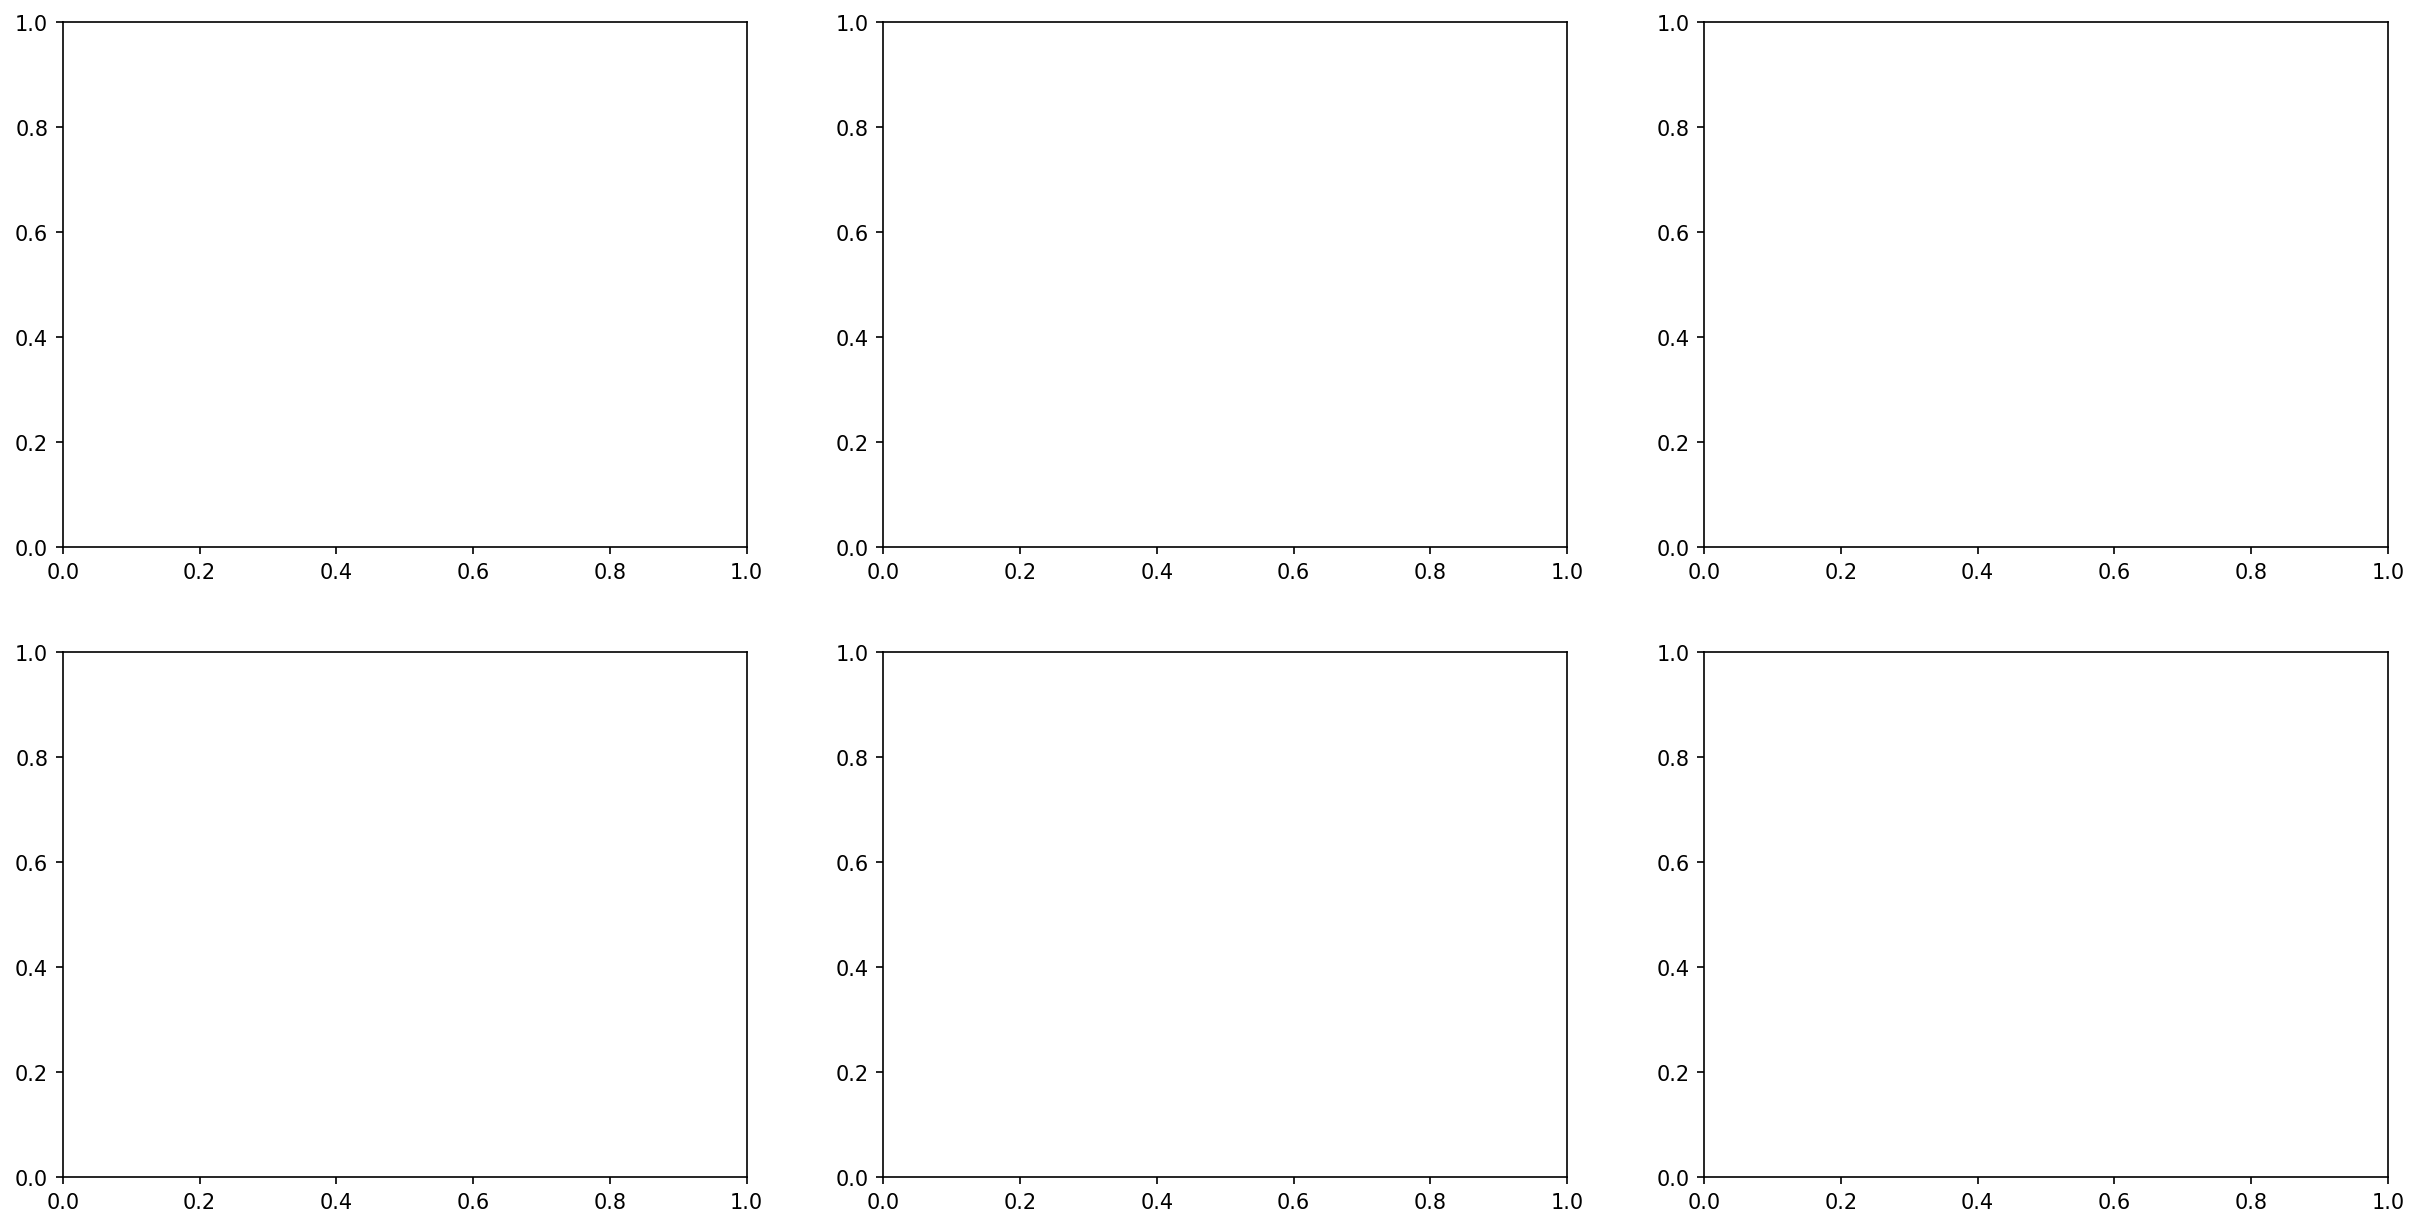

In [7]:
classes = df["acc_per_class"].values[0].keys()

# Define a function to truncate class names
def truncate_class_name(class_name, max_length=10):
    if len(class_name) > max_length:
        return class_name[:max_length] + '...'
    else:
        return class_name

# Filter for 'active_calibrated' experiment type
df_filtered = df[df["experiment_type"] == "active_jempp"]

# Get unique 'num_labeled' values and select the first, second, and last
num_labeled_values = df_filtered["num_labeled"].unique()
selected_num_labeled = [num_labeled_values[0], num_labeled_values[1], num_labeled_values[-1]]

# Filter for selected 'num_labeled' values
df_filtered = df_filtered[df_filtered["num_labeled"].isin(selected_num_labeled)]

# Group by 'num_labeled'
grouped = df_filtered.groupby('num_labeled')

fig, axs = plt.subplots(2, 3, figsize=(20, 10), dpi=150)

# Iterate over number of labeled samples
for i, (num_labeled, group) in enumerate(grouped):
    # Get the class distribution for each class
    dist_values = np.array(
        [
            group["class_dist"]
            .apply(lambda x: x[class_name])
            .values[0]
            for class_name in classes
        ]
    )

    full_dist_values = np.array(
        [
            group["full_dist"]
            .apply(lambda x: x[class_name])
            .values[0]
            for class_name in classes
        ]
    )

    classnames = [truncate_class_name(class_name) for class_name in classes]
    
    axs[0, i].bar(classes, full_dist_values, color="gray", zorder=1)
    axs[0, i].bar(classes, dist_values, label=f"active_calibrated {num_labeled}", color='b', zorder=2)
    axs[0, i].set_title(f"{num_labeled} labeled samples")
    axs[0, i].tick_params(axis="y", labelsize=12)
    axs[0, i].set_xticks(np.arange(len(classes)))
    axs[0, i].set_xticklabels(classnames, rotation=45, fontsize=12, rotation_mode="anchor", ha="right")
    axs[0, i].sharey(axs[0, 2])

# Iterate over number of labeled samples
for i, (num_labeled, group) in enumerate(grouped):
    # Get the class distribution for each class
    dist_values = np.array([group["acc_per_class"].apply(lambda x: x[class_name]).values[0] for class_name in classes])

    classnames = [truncate_class_name(class_name) for class_name in classes]

    # Plotting a single group of bars for each experiment type
    axs[1, i].bar(classes, dist_values, label=f"active_calibrated {num_labeled}", color='b')
    axs[1, i].set_title(f"{num_labeled} labeled samples")
    axs[1, i].tick_params(axis="y", labelsize=12)
    axs[1, i].set_xticks(np.arange(len(classes)))
    axs[1, i].set_xticklabels(classnames, rotation=45, fontsize=12, rotation_mode="anchor", ha="right")
    axs[1, i].sharey(axs[1, 2])


plt.tight_layout()
plt.show()
# plt.savefig(f"{dataset}_class_dist.png")